In [ ]:
# 必要なモジュールの導入
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom

In [ ]:
# matplotlibでグラフが描画されないとき，「#」を外してこちらを実行する
# %matplotlib inline

# 準備

## モジュール``numpy``について
``numpy``は配列処理等が得意なモジュールであり，科学計算でよく利用される．
基本的な配列作成の書式は
```
dice = np.array([1,2,3,4,5,6])
```
とすればよい．

``numpy``の配列においては，すべての要素に対する操作を
```
np.array([1,2,3,4,5,6]) * 2
```
などとして容易に行うことができる．

次のコードを実行し，結果を観察してみよ．

In [ ]:
data1 = np.array([1,2,3,4,5,6,7,8,9,10])
data2 = np.array([10,9,8,7,6,5,4,3,2,1])
print(data1 * 2)
print(data1 ** 2)
print(data1 * data2)

[ 2  4  6  8 10 12 14 16 18 20]
[  1   4   9  16  25  36  49  64  81 100]
[10 18 24 28 30 30 28 24 18 10]


（観察して気づいたことを記入）
それぞれの配列の要素どうしの演算結果をもつ配列が出力されている．

## 乱数生成について
ここでは，``numpy``を利用した乱数列を生成する．
乱数列を生成することで，疑似的なランダムサンプリングのシミュレートが可能になる．

### 乱数の生成
``numpy``にはさまざまな乱数生成のメソッドが用意されている．
ここでは，一様分布，正規分布，二項分布に従う乱数列をそれぞれ生成してみよう．

### 復元抽出と非復元抽出
母集団から標本を抽出する方法として，**復元抽出**と**非復元抽出**とがある．
Pythonでは，配列から数値を抽出する方法として，``random.choice``がある．

例えば，さいころを$100$回投げる実験をシミュレーションするには，以下のように記述すればよい．
```
dice = np.array([1,2,3,4,5,6])
print(np.random.choice(dice, 100, replace = True))
```
上における``replace``が抽出方法を定めるオプションであり，この値を``True``（，またはこのオプションを省略する）とすると復元抽出，``False``とすると非復元抽出した結果を出力する．

次のコードを何回か実行し，その結果について考察せよ．

In [ ]:
data = np.array([1,2,3,4,5,6,7,8,9,10])
print(np.random.choice(data, 10, replace = True))
print(np.random.choice(data, 10, replace = False))

[ 6  8  6  8 10  8  5  2  9  9]
[ 3  7  8  6  9  2  1  5 10  4]


（考察結果を記入）
`replace=True`とした方の結果には，同一の要素が複数回現れ得るが，`replace=False`とした方の結果にはそのようなことは起こりえないことが，出力結果からも読み取れる．

## モジュール``matplotlib``について
``matplotlib``は，データの可視化のためのモジュールである．
``matplotlib``を利用することで，ヒストグラムや散布図，さまざまな関数のグラフを描画できる．

なお，Jupyter Notebookでグラフが表示できない場合，以下のマジックコマンドを実行しておく．
```
%matplotlib inline
```
モジュール``seaborn``は，``matplotlib``と一緒にインポートしておくことで，グラフ描画がきれいになったり，細かなスタイル指定が可能になるものである．

関数のグラフを描画するには，以下のようなコードを実行する．
```
def function(n):
  return # 関数の定義式，lambda記法も使える

x = np.arange(0,10) # 関数のグラフを描画するx座標の範囲を指定
# x = np.linspace(0,10,100) # 区間を100分割するならこちら
plt.figure(figsize = (10,3))
plt.plot(x, function(x)) # グラフの描画
plt.title("関数のグラフ") # グラフタイトル
plt.xlabel("x軸の名前") # 軸の名前
plt.ylabel("y軸の名前")
plt.grid(True) # 描画領域にグリッド（目盛）を記入
```
ここに書いたコードは，最も素朴なものである．
意欲のある人は，``matplotlib``でのグラフ描画について，さらに調べてみるとよい．

いくつかの関数について，グラフを描いてみよ．

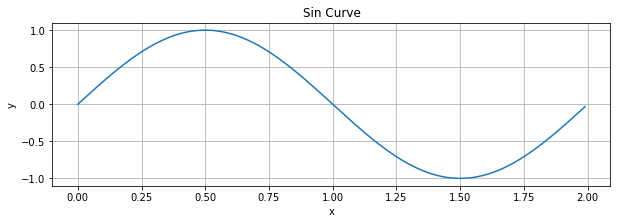

In [ ]:
# コードを記述し，グラフを描いてみよ
def sin(x):
  return np.sin(x * np.pi)

x = np.arange(0,2,0.01)
plt.figure(figsize=(10,3))
plt.plot(x, sin(x))
plt.title("Sin Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

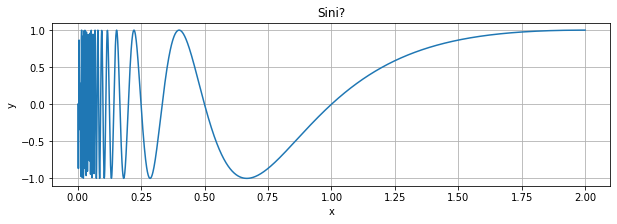

In [ ]:
# コードを記述し，グラフを描いてみよ
sini = lambda x: np.sin(np.pi / x)

x = np.arange(0.001,2,0.001)
plt.figure(figsize=(10,3))
plt.plot(x, sini(x))
plt.title("Sini?")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

# モジュール`scipy`について
`scipy`は，科学計算を得意とするモジュールであるが，詳細は次回以降に触れることにする．

# 正規分布への近似

$5$本に$1$本の割合で当たりがでる，くじ付きの菓子を無作為に$30$個購入する．
この$30$個の菓子の中に$8$本以上当たりが含まれる確率を，二項分布の正規分布への近似を利用して求めてみよう．

## 利用するツール
* 平均と標準偏差が$\mu$，$\sigma$である正規分布$N(\mu, \sigma)$に従う確率変数$X$の累積分布関数$F(x) = P(X \geqq x)$は，以下の関数を利用するとよい．
```
lambda x: norm.cdf(x, loc=mu, scale=sigma)
```
* 二項分布の分布の様子を理論的に表すグラフの描き方は，以下を参考に．
```
N, p = 10, 0.1
x1 = np.arange(N+1) # x1は0以上(N+1)未満の整数値からなるリスト
plt.plot(x1, binom.pmf(x1,N,p), "o") # リストx1の中のそれぞれの値に対して二項分布B(N,p)による確率を与える関数のグラフを描画する
plt.grid(True) # ここをTrueにすると，描画領域内にグリッドを加える
```
* 正規分布の確率密度関数のグラフの描き方は，以下を参考に．
```
m, s = 0, 1
x2 = np.arange(-1,1,0.01) # x2は0以上(N+1)未満の実数を0.01刻みで格納するリスト
plt.plot(x2,norm.pdf(x2, loc=m, scale=s), linewidth=3) # m，sを平均，標準偏差に持つ正規分布N(m,s)の確率密度関数のグラフを描画する
plt.grid(True)
```

## 考え方

1. 菓子のあたりが出る本数を確率変数$X$で表す．$X \sim B(N,p)$となる$N$，$p$は何であるべきか．
2. 確率変数$X$の平均$\mu = E(X)$と標準偏差$\sigma = \sigma(X)$は$N$と$p$からどのように計算されるだろうか．
計算式を考えてみよ．
3. 確率変数$X$が正規分布$N(\mu,\sigma)$に従うとすると，$X \geqq 8$となる確率は正規分布の累積分布関数からどのように計算すればよいだろうか．
4. 二項分布を正規分布とみなして計算することが不自然でないか，それぞれの分布の様子を比較して確かめておこう．
いずれも，区間$[0, N]$（すなわち$0 \leqq x \leqq N$）でグラフを描画してみよ．

In [ ]:
# コードを記述し，確率を計算せよ
N, p = 30, .2
m = N * p
s = (N * p * (1-p))**0.5

def LProb(x):
  return 1 - norm.cdf(x, loc = m, scale = s)

print("X>=8となる確率は，", LProb(8))

X>=8となる確率は， 0.1806552142630895


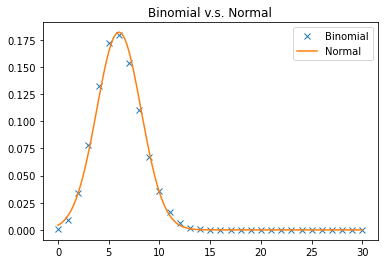

In [ ]:
# 二項分布と正規分布の分布の様子がかけ離れたものでないか，グラフを描いて確認せよ
x1 = np.arange(N+1)
plt.plot(x1, binom.pmf(x1,N,p),'x',label="Binomial")
x2 = np.arange(0,N,0.01)
plt.plot(x2, norm.pdf(x2,loc=m,scale=s),label="Normal")
plt.title("Binomial v.s. Normal")
plt.legend()
plt.show()

（考察を記入）

# 実験: 大数の法則
下のコードにおいて，さいころを投げる回数``N``をさまざまに設定し，出る目の平均値がどのような値に近づいていくかを観察してみよう．

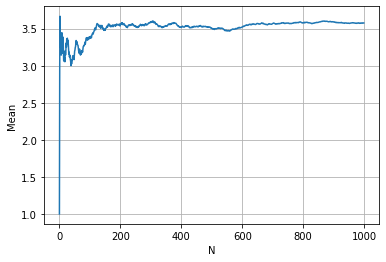

In [ ]:
# 大数の法則

# 試行回数（ここを変化させてみる）
N = 10**3

# さいころ
dice = np.array([1,2,3,4,5,6])
counter = np.arange(1, N+1)

# さいころの目の和
throw = np.random.choice(dice, N).cumsum()
plt.plot(throw / counter)
plt.xlabel("N")
plt.ylabel("Mean")
plt.grid(True)

# 実験: 中心極限定理

いくつかの分布に従う乱数列の標本平均からなるデータが，その大きさを大きくしたときにどのように分布するか，観察してみよう．

以下の手順で乱数の標本平均の抽出を繰り返し，標本平均の分布について調べよ．
- 二項分布$B(N,p)$，正規分布$N(m,s^2)$，一様分布$U(\alpha,\beta)$に従う乱数を$k =$ `size`個生成する．

- 得られた$k$個の標本$[x_1,x_2,\ldots,x_k]$に対して，標本平均をとる:
$$
\overline{x} = \frac{1}{k} \sum_{i=1}^k x_i
$$

- この標本平均とる操作を$n =$ `times`回繰り返し，標本平均からなる配列$[ {\overline{x}}_1,{\overline{x}}_2,\ldots,{\overline{x}}_n]$をつくる．

- 得られた標本平均からなる配列をデータとするヒストグラムを描画する．

$k$（`size`）や$n$（`times`）の値を増減させると，標本平均の分布の様子はどのように変化するだろうか，観察し，まとめよ．

なお，下のコードでは，それぞれの分布から取り出された乱数の標本平均の分布の様子を読み取りやすくするために，$3$つの分布$B(N,p)$，$N(m,s^2)$，$U(\alpha,\beta)$の平均と標準偏差が等しくなるように設計している．
また，中心極限定理の主張する正規分布のグラフを，理論値として描画されるようにしている．
考察の参考にされたい．

Text(0.5, 1.0, 'From Uniforim Distribution')

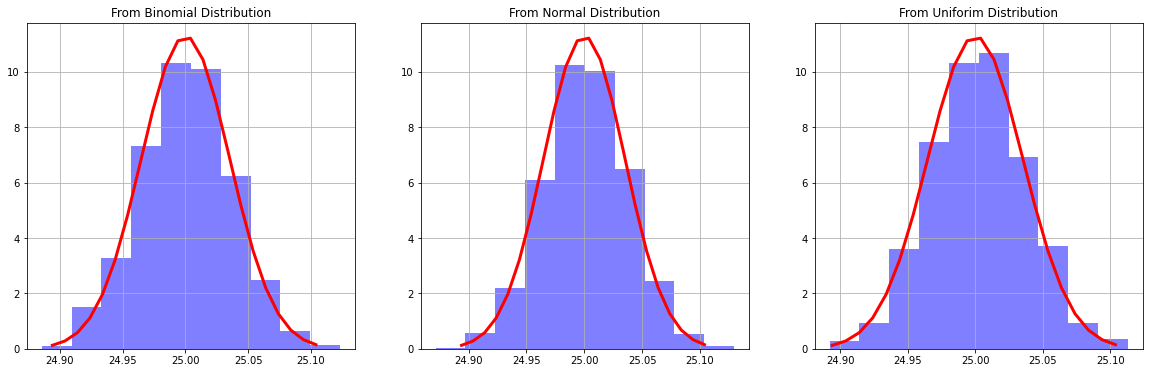

In [ ]:
# 二項分布B(N,p)のNとpを設定（ここのNは大きい値に設定しなくてよい）
N, p = 50, .5

# 1回に抽出する標本の大きさを設定（このsizeを大きくするとそれぞれのヒストグラムの形状はどうなるか）
size = 10000

# 標本平均をとる回数を設定（timesは何回標本平均をとるか→描画するヒストグラムのデータ数）
times = 1000

# スタージェスの公式からくる，程よいとされるヒストグラムの階級数
# k = 1 + np.log2(times)

# 以下は自動的に計算される（中身を書き換えて遊んでもいいけど，触らなくても実験ができるように設計しています）

# 二項分布の平均mと標準偏差s→正規分布N(m,s^2)に従う標本と分布の様子が似てくるはず
m = N * p
s = (N * p * (1-p))**0.5

# 一様分布U(alpha,beta)の平均と分散の式（cf.311_ContDist.pdf）からalpha,betaの値を求める
alpha, beta = m - s * (3.0 ** 0.5), m + s * (3.0 ** 0.5)

# 中心極限定理の主張する，標本平均の分布が近づくとされる正規分布の理論的な平均と標準偏差
mu = m
sigma = s / (size ** 0.5)

# 標本平均を収集する配列（まずは空列として用意）
bin_mean_array = np.array([])
norm_mean_array = np.array([])
uni_mean_array = np.array([])

# 二項分布に従うデータからsize個のデータを抽出し，標本平均をとる操作をtimes回行う
for i in range(times):
  cum_variables = np.random.binomial(N,p,size).cumsum() # B(N,p)に従う乱数をsize個取り出したものを配列にし，その累積和（cumsum）をとる
  bin_mean_array = np.append(bin_mean_array, cum_variables[-1] / size) # 上の累積和の結果をsizeで割り平均をとり，配列bin_mean_arrayに加える

# 正規分布に従うデータからsize個のデータを抽出し，標本平均をとる操作をtimes回行う
for i in range(times):
  cum_variables = np.random.normal(m,s,size).cumsum()
  norm_mean_array = np.append(norm_mean_array, cum_variables[-1] / size)

# 一様分布に従うデータからsize個のデータを抽出し，標本平均をとる操作をtimes回行う
for i in range(times):
  cum_variables = (np.random.rand(size) * (beta - alpha) + alpha).cumsum()
  uni_mean_array = np.append(uni_mean_array, cum_variables[-1] / size)

# ヒストグラムの描画
plt.figure(figsize=(20,6))
x = np.arange(mu - 3*sigma,mu + 3*sigma,.01) #理論的な正規分布の描画範囲

# 二項分布からの標本平均のヒストグラム
plt.subplot(1,3,1)
plt.hist(bin_mean_array,density=True,color="blue",alpha=.5)
y1 = norm.pdf(x, loc = mu, scale = sigma) # 中心極限定理の正規分布の描画
plt.plot(x,y1,linewidth=3,color="red")
plt.grid(True)
plt.title("From Binomial Distribution")

# 正規分布からの標本平均のヒストグラム
plt.subplot(1,3,2)
plt.hist(norm_mean_array,density=True,color="blue",alpha=.5)
y2 = norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x,y2,linewidth=3,color="red")
plt.grid(True)
plt.title("From Normal Distribution")

# 一様分布からの標本平均のヒストグラム
plt.subplot(1,3,3)
plt.hist(uni_mean_array,density=True,color="blue",alpha=.5)
y3 = norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x,y3,linewidth=3,color="red")
plt.grid(True)
plt.title("From Uniforim Distribution")


（ここに考察を記入する）

＜本授業の学び＞
本授業で学んだことを，下のテキストボックスに記入して下さい．

（ここに本授業の学びを記入する）